## Shearing

In [1]:
import numpy as np
import cv2

In [2]:
# Define shearing factors( adjust as needed)
shear_x = 0.40
shear_y = -0.25

# create transformation matrix
M = np.array([[1,shear_x,0],
              [shear_y,1,0],
              [0,0,1]])

image = cv2.imread('lenna.png')
#store the ht & wth of the image
rows,cols, _ = image.shape

T = np.float32([[1, 0, 0], [0,1,150]])

#we use wrapapline to transform the image using Matrix
img_translation = cv2.warpAffine(image, T, (int(cols*1.5),int(rows*1.5)))


sheared_image = cv2.warpPerspective(img_translation, M, (int(cols*1.5),int(rows*1.5)))

cv2.imshow('Final', sheared_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Shearing using Skimage

In [3]:
import skimage
skimage.__version__


'0.22.0'

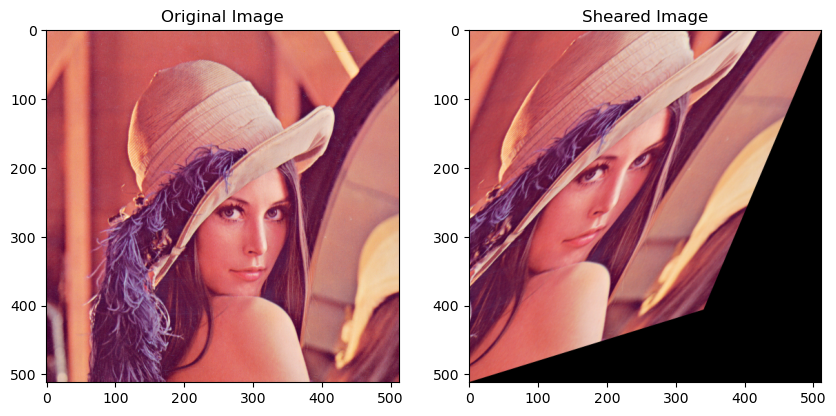

In [4]:
from skimage import transform
from skimage import io

img = io.imread('lenna.png')

# Define shearing factors (adjust as needed)
shear_x = -0.40 # shear along x-axis
shear_y = -0.3 # shear along y-axis

# create transformation matrix
tform = transform.AffineTransform(shear=(shear_x,shear_y))
#apply trannsformation using warp
img_sheared = transform.warp(img,tform)

#display images(using matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img),plt.title('Original Image')
plt.subplot(122),plt.imshow(img_sheared),plt.title('Sheared Image')
plt.show()


In [5]:
# help(transform.AffineTransform)

In [6]:
import numpy as np
import cv2

In [7]:
image = cv2.imread('lenna.png')

# define transformation parameters
tx = 50 # translation along x-axis
ty = 100
angle = 45
scale = 1.2
shear_x = 0.3
shear_y = 0.2

# create transformation matrix
M = np.float32([[scale* np.cos(np.radians(angle)), shear_x, tx],
               [shear_y, scale* np.sin(np.radians(angle)), ty]])

#applly transformation using wrapappine
img_affine = cv2.warpAffine(img,M,(512,512))

new_image= np.vstack([img, img_affine])

cv2.imshow('Affine Transformed Image', new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# pip install scikit-image==0.22.0 --user

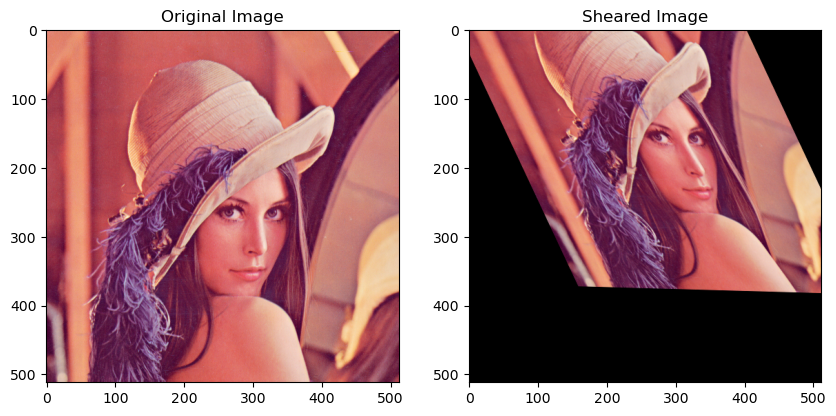

In [9]:
from skimage import transform
from skimage import io

img = io.imread('lenna.png')

tx = 20  #translational along x-axis
ty = 100  #translational along y-axis
shear_x = 0.3 # shear along x-axis
shear_y = 0.2 # shear along y-axis
angle = 10  #rotation angle in degrees
scale = 1.2  #scaling factor

# create transformation matrix
tform = transform.AffineTransform(scale=(scale,scale),
                                 rotation = np.radians(angle),
                                 translation=(tx,ty),
                                 shear=(shear_x,shear_y))
#apply trannsformation using warp
img_sheared = transform.warp(img,tform)

#display images(using matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img),plt.title('Original Image')
plt.subplot(122),plt.imshow(img_sheared),plt.title('Sheared Image')
plt.show()


In [10]:
tform

<AffineTransform(matrix=
    [[ 1.22400958e+00, -5.73941897e-01,  2.00000000e+01],
     [-3.11786843e-02,  1.11731049e+00,  1.00000000e+02],
     [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]) at 0x2248239d110>

In [11]:
import tkinter
from PIL import ImageTk, Image
import os

# creating main window
root = tkinter.Tk()

# loading the image
img = ImageTk.PhotoImage((Image.open("lenna.png")))

# reading the image
panel = tkinter.Label(root, image=img)

# setting the appliction
panel.pack(side = 'bottom', fill ='both',
          expand='yes')

# runninhgb the application
root.mainloop()

In [12]:
41-24

17

### Projective Transformation

In [13]:
import numpy as np
import cv2

img = cv2.imread('lenna.png')

# Define source & desination
source_points = np.array([[100,50],[200,50],[200,150],[100,150]],
                        dtype=np.float32)
desination_points = np.array([[50,50],[150,50],[250,250],[100,150]],
                        dtype=np.float32)

# computate transformation matrix
M = cv2.findHomography(source_points,desination_points)[0]

# Apply transformation 
img_transformed = cv2.warpPerspective(img, M , (512,512))

# di
cv2.imshow('Original Image', img)
cv2.imshow('Projective Transformed Image', img_transformed)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


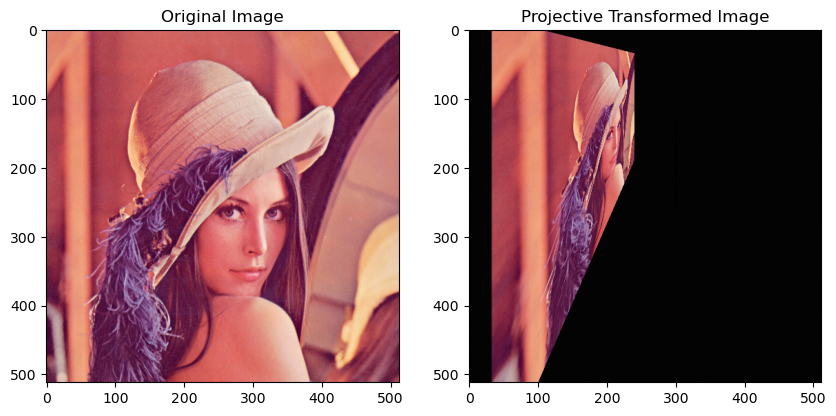

In [14]:
img = io.imread('lenna.png')

# Define source & desination
source_points = [[100,50],[200,50],[200,150],[100,150]]
desination_points = [[50,50],[250,50],[250,250],[50,150]]

# create transformation object
tform = transform.ProjectiveTransform()

#fill the transform using source & desination points
tform.estimate(source_points,desination_points)

# Apply transform using warp
img_transformed = transform.warp(img,tform)

#display images(using matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(121),plt.imshow(img),plt.title('Original Image')
plt.subplot(122),plt.imshow(img_transformed),plt.title('Projective Transformed Image')
plt.show()

## Morphological Transformation

In [15]:
import numpy as np
import cv2

In [16]:
gray = cv2.imread('lenna.png', 0)

# Threshold the image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Erosion - remove noise
eroded = cv2.erode(thresh, np.ones((3,3), np.uint8))

# Dilation - expand objects
dilated = cv2.dilate(thresh, np.ones((3,3), np.uint8))

# Opening - remove noise while preserving objects size
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,np.ones((3,3), np.uint8))

# Closing - fill small holes
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,np.ones((3,3), np.uint8))

cv2.imshow('Original Image', thresh)
cv2.imshow('eroded Image', eroded)
cv2.imshow('dilated Image', dilated)
cv2.imshow('opening Image', opening)
cv2.imshow('closing Image', closing)
cv2.waitKey(0)
cv2.destroyAllWindows()